<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_2X/blob/main/GQtest_cluster_data(y_hat)_add_delta_(_1_2)_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_2X/addition_delta_-1.2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-1.2_n250.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,79.442916,85.603269,-0.067844,174.978341,175.052362,-0.074021
1,0.0,1.0,21.021089,37.661017,-0.127834,68.554272,68.694121,-0.139849
2,0.0,2.0,78.933047,69.130350,-0.102527,157.960870,158.073680,-0.112811
3,0.0,3.0,88.212822,54.207787,0.004469,152.425078,152.435657,-0.010579
4,0.0,4.0,83.001189,96.468525,-0.086664,189.383050,189.473528,-0.090479
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,41.763521,34.609162,-0.072380,86.300303,86.375368,-0.075065
249996,999.0,246.0,21.746830,57.765714,0.093796,89.606340,89.506692,0.099649
249997,999.0,247.0,95.637847,53.015327,-0.008278,158.644896,158.661618,-0.016722
249998,999.0,248.0,82.939364,20.612286,-0.023078,113.528571,113.564722,-0.036151


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    79.442916  85.603269 -0.067844  174.978341  175.052362 -0.074021
      1.0    21.021089  37.661017 -0.127834   68.554272   68.694121 -0.139849
      2.0    78.933047  69.130350 -0.102527  157.960870  158.073680 -0.112811
      3.0    88.212822  54.207787  0.004469  152.425078  152.435657 -0.010579
      4.0    83.001189  96.468525 -0.086664  189.383050  189.473528 -0.090479
...                ...        ...       ...         ...         ...       ...
999.0 245.0  41.763521  34.609162 -0.072380   86.300303   86.375368 -0.075065
      246.0  21.746830  57.765714  0.093796   89.606340   89.506692  0.099649
      247.0  95.637847  53.015327 -0.008278  158.644896  158.661618 -0.016722
      248.0  82.939364  20.612286 -0.023078  113.528571  113.564722 -0.036151
      249.0  58.517032  82.141908 -0.060756  150.598184  150.654499 -0.056315

[250000 rows x 6 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    79.442916  85.603269 -0.067844  174.978341  175.052362 -0.074021
      1.0    21.021089  37.661017 -0.127834   68.554272   68.694121 -0.139849
      2.0    78.933047  69.130350 -0.102527  157.960870  158.073680 -0.112811
      3.0    88.212822  54.207787  0.004469  152.425078  152.435657 -0.010579
      4.0    83.001189  96.468525 -0.086664  189.383050  189.473528 -0.090479
...                ...        ...       ...         ...         ...       ...
999.0 245.0  41.763521  34.609162 -0.072380   86.300303   86.375368 -0.075065
      246.0  21.746830  57.765714  0.093796   89.606340   89.506692  0.099649
      247.0  95.637847  53.015327 -0.008278  158.644896  158.661618 -0.016722
      248.0  82.939364  20.612286 -0.023078  113.528571  113.564722 -0.036151
      249.0  58.517032  82.141908 -0.060756  150.598184  150.654499 -0.056315

[250000 rows x 6 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,79.442916,85.603269,-0.067844,174.978341,175.052362,-0.074021
1,0.0,1.0,21.021089,37.661017,-0.127834,68.554272,68.694121,-0.139849
2,0.0,2.0,78.933047,69.130350,-0.102527,157.960870,158.073680,-0.112811
3,0.0,3.0,88.212822,54.207787,0.004469,152.425078,152.435657,-0.010579
4,0.0,4.0,83.001189,96.468525,-0.086664,189.383050,189.473528,-0.090479
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,41.763521,34.609162,-0.072380,86.300303,86.375368,-0.075065
249996,999.0,246.0,21.746830,57.765714,0.093796,89.606340,89.506692,0.099649
249997,999.0,247.0,95.637847,53.015327,-0.008278,158.644896,158.661618,-0.016722
249998,999.0,248.0,82.939364,20.612286,-0.023078,113.528571,113.564722,-0.036151


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    79.442916  85.603269 -0.067844  174.978341  175.052362 -0.074021
      1.0    21.021089  37.661017 -0.127834   68.554272   68.694121 -0.139849
      2.0    78.933047  69.130350 -0.102527  157.960870  158.073680 -0.112811
      3.0    88.212822  54.207787  0.004469  152.425078  152.435657 -0.010579
      4.0    83.001189  96.468525 -0.086664  189.383050  189.473528 -0.090479
...                ...        ...       ...         ...         ...       ...
999.0 245.0  41.763521  34.609162 -0.072380   86.300303   86.375368 -0.075065
      246.0  21.746830  57.765714  0.093796   89.606340   89.506692  0.099649
      247.0  95.637847  53.015327 -0.008278  158.644896  158.661618 -0.016722
      248.0  82.939364  20.612286 -0.023078  113.528571  113.564722 -0.036151
      249.0  58.517032  82.141908 -0.060756  150.598184  150.654499 -0.056315

[250000 rows x 6 columns]

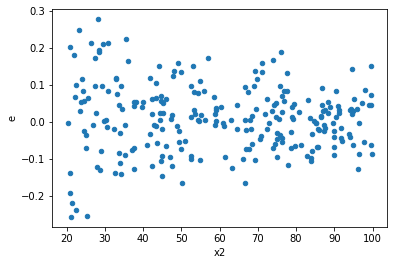

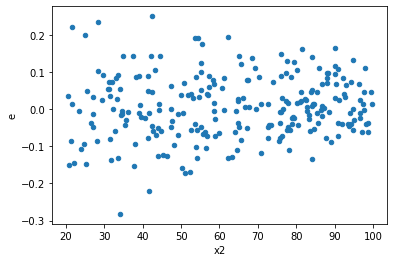

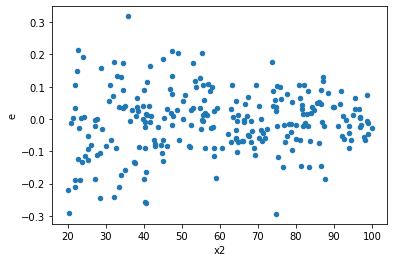

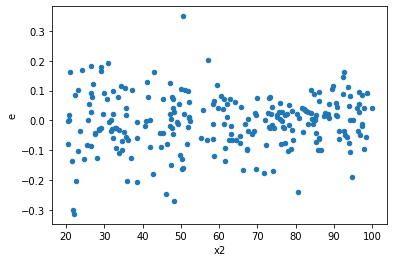

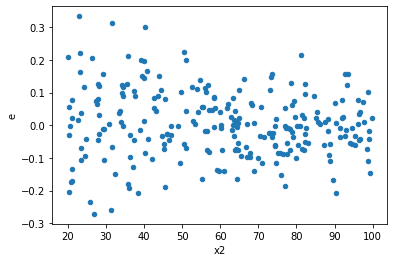

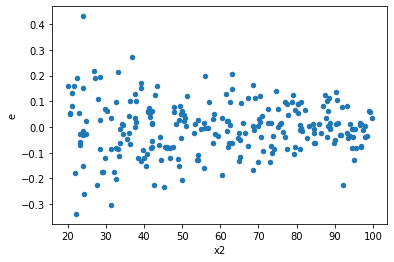

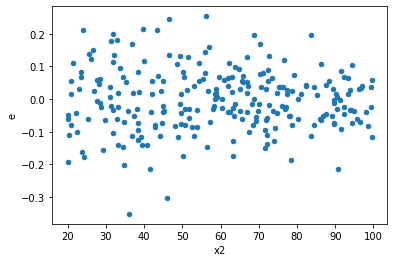

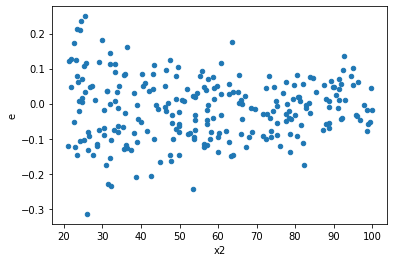

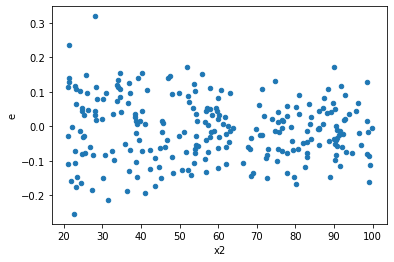

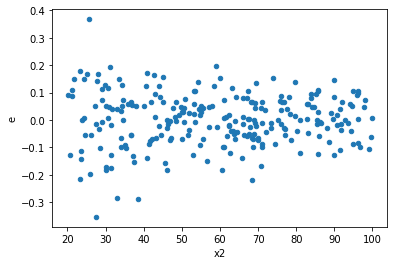

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,123.0,123.0,0.6477859737301034,1.410992470561905,0.00526655263195206,0.011471483500503293,2.1781769408143865,2.084392622814235e-05,0.9999895780368859,1.0421963114071175e-05,Reject001=0 : Heteroscedasticity
1.0,122.0,124.0,0.6626055870830401,1.0777792896621297,0.00543119333674623,0.008691768465017175,1.6003423052923984,0.009530721935823605,0.9952346390320882,0.0047653609679118025,Reject001=0 : Heteroscedasticity
4.0,110.0,136.0,0.9523722801165952,1.5861554556196598,0.008657929819241775,0.011662907761909263,1.3470781128288993,0.09862797575529503,0.9506860121223525,0.049313987877647514,Reject001=1 : Homoscedasticity
9.0,138.0,108.0,0.8696617339336253,1.3323212886052478,0.00630189662270743,0.012336308227826368,1.9575548388679256,0.00031733481789708584,0.9998413325910515,0.00015866740894854292,Reject001=0 : Heteroscedasticity
10.0,135.0,111.0,0.910098704138493,1.139531859803993,0.006741471882507356,0.010266052791026964,1.5228206792147458,0.02222365796554593,0.988888171017227,0.011111828982772964,Reject001=1 : Homoscedasticity
14.0,133.0,113.0,1.0293702988747717,1.5978987484437,0.00773962630732911,0.0141406968888823,1.8270516336805096,0.0010801203562633699,0.9994599398218683,0.0005400601781316849,Reject001=0 : Heteroscedasticity
15.0,99.0,147.0,0.7629825403856855,1.784837921011397,0.0077068943473301565,0.01214175456470338,1.5754406402248866,0.01223622990105433,0.9938818850494728,0.006118114950527165,Reject001=1 : Homoscedasticity
18.0,130.0,116.0,0.8245988836397427,1.556849284271988,0.006343068335690328,0.013421114519586105,2.1158710279171946,4.851517155923801e-05,0.9999757424142204,2.4257585779619006e-05,Reject001=0 : Heteroscedasticity
21.0,104.0,142.0,0.780115380616942,1.772666920635254,0.007501109429009057,0.01248356986362855,1.6642298025077216,0.004860873419848977,0.9975695632900755,0.0024304367099244883,Reject001=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,123.0,123.0,0.6477859737301034,1.410992470561905,0.00526655263195206,0.011471483500503293,2.1781769408143865,2.084392622814235e-05,Reject001=0 : Heteroscedasticity
1.0,122.0,124.0,0.6626055870830401,1.0777792896621297,0.00543119333674623,0.008691768465017175,1.6003423052923984,0.009530721935823605,Reject001=0 : Heteroscedasticity
2.0,135.0,111.0,1.5554088428667732,0.7732625263913288,0.011521546984198319,0.0069663290665885474,0.604634870312363,0.005351650836877048,Reject001=0 : Heteroscedasticity
3.0,107.0,139.0,1.223622349829648,0.8074204593207805,0.011435722895604185,0.0058087802828833135,0.5079504230656174,0.00029138012538522487,Reject001=0 : Heteroscedasticity
4.0,110.0,136.0,0.9523722801165952,1.5861554556196598,0.008657929819241775,0.011662907761909263,1.3470781128288993,0.09862797575529503,Reject001=1 : Homoscedasticity
5.0,110.0,136.0,1.7621736755542547,0.8412706518226981,0.01601976068685686,0.006185813616343369,0.3861364559221171,4.2710479593231057e-07,Reject001=0 : Heteroscedasticity
6.0,106.0,140.0,1.1465261914904268,1.0599997997207251,0.010816284825381385,0.007571427140862322,0.7000025667866371,0.05414849345711265,Reject001=1 : Homoscedasticity
7.0,135.0,111.0,1.4878197321829811,0.48875132142662514,0.01102088690505912,0.004403165057897524,0.3995291028597942,4.490274305295045e-07,Reject001=0 : Heteroscedasticity
8.0,125.0,121.0,1.2234560400687902,0.7700168787479796,0.009787648320550322,0.006363775857421319,0.6501843598180598,0.017467882989724213,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    765
Reject001=1 : Homoscedasticity      235
Name: Result_test, dtype: int64